In [0]:
  !curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
from fastai.vision import *

In [0]:
classes = ['cheetah', 'lion', 'tiger']

In [0]:
path = Path('.')
for c in classes:
    print(c)
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/f'{c}.txt', dest, max_pics=200)
    verify_images(path/c, delete=True, max_size=200)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), 
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['cheetah', 'lion', 'tiger']

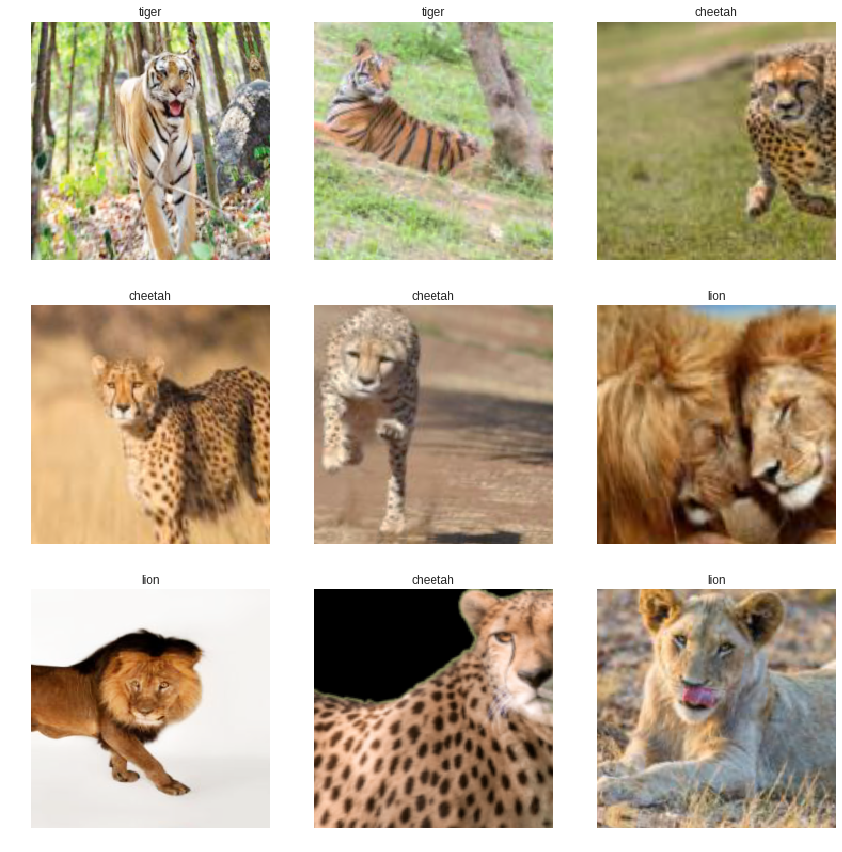

In [0]:
data.show_batch(rows=3)

In [0]:
len(data.train_ds), len(data.valid_ds)

(376, 93)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy
1,1.045479,0.191888,0.967742
2,0.571001,0.107582,0.978495
3,0.403151,0.107150,0.989247


In [0]:
learn.save('stage-1')

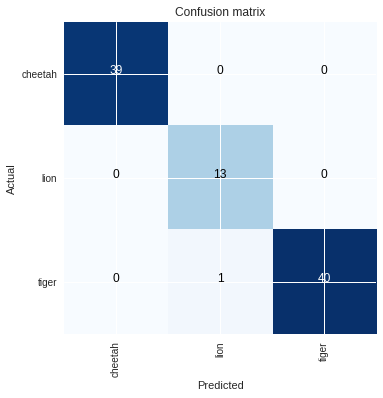

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

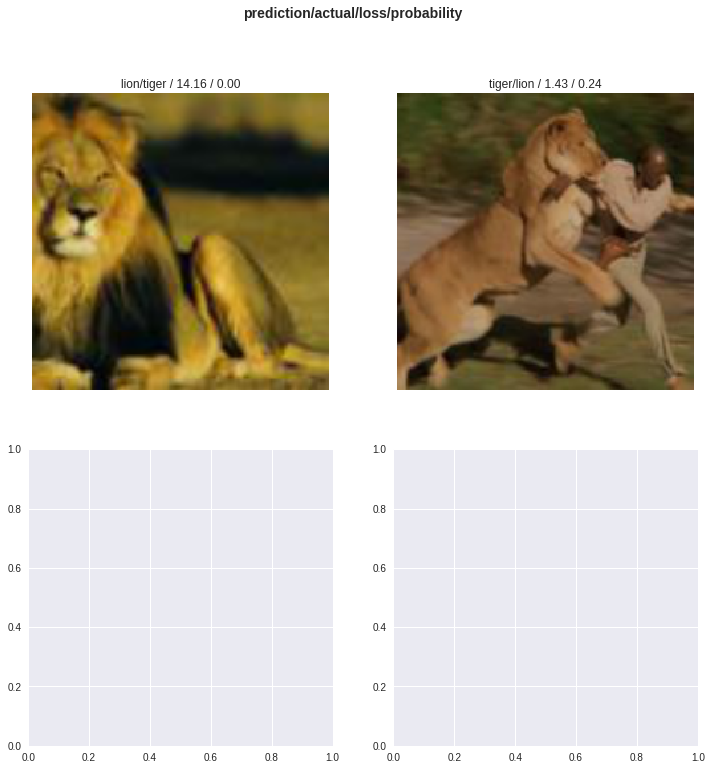

In [0]:
interp.plot_top_losses(2)

In [0]:
learn.load('stage-1')

In [0]:
learn.export()